## Using least-square fitting to calculate the Hubble Constant 

Calculating the unweighted and weighted linear least-squares fits using several different methods :

-> First principles 

-> Using the Numpy polyfit() function to fit to an order-1 polynomial 

-> Using the scipy curve_fit() function to fit to the function y = mx + c


## Part 1) a) - First Principle : Unweighted 
Addapting the code for the straight line fitting to calculate unweighted fir to the data using equiations below:

Equation (1):
$$ v = H_0 d $$ 

Equation (2):
$$S = \sum(y_i - mx_i -c)^2$$

Equation (3):
$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$

Equation (4):
$$ c = \bar{y} - m \bar{x} $$

Equation (5):
$$ D =\sum\limits_{i=1}^{n}(x_i - \bar{x})^2 $$

Equation (6):
$$ \Delta m = \sqrt{ \frac{S} {(n-2){D}} } $$

Equation (7):
$$ \Delta c = \sqrt{(\frac{1}{n} + \frac{\bar{x}^2}{D}){\frac{S}{(n-2){D}}}}  $$



--------------------------------------------------------------
Velocity in km/s
[ 2997.92458   3597.509496  4197.094412  4796.679328  5696.056702
  6895.226534  7794.603908  9293.566198 11092.32095  12891.07569
 15289.41536  17987.54748  20985.47206  24582.98156  29079.86843
 34176.34021  40172.18937 ]
--------------------------------------------------------------
Dinstace in Mpc
[ 38.97421667  59.67613575  58.67162922  66.63668877  82.92570962
  97.23112378 112.3102167  141.156321   163.6656431  193.6038969
 213.9055825  270.1486631  306.2207743  390.2323504  447.3534677
 527.9269922  650.9837401 ]
--------------------------------------------------------------
Error in Distance
[13.09199001 23.05675467 10.60492452 11.10174356 16.31815462 12.56544864
 15.79248846 18.44966847 21.40363907 33.49798905 45.75723619 38.62197682
 46.45148095 49.10579808 61.7358336  45.50476729 57.88044981]
--------------------------------------------------------------

The x mean is 14795.639545176471
The y m

<IPython.core.display.Javascript object>


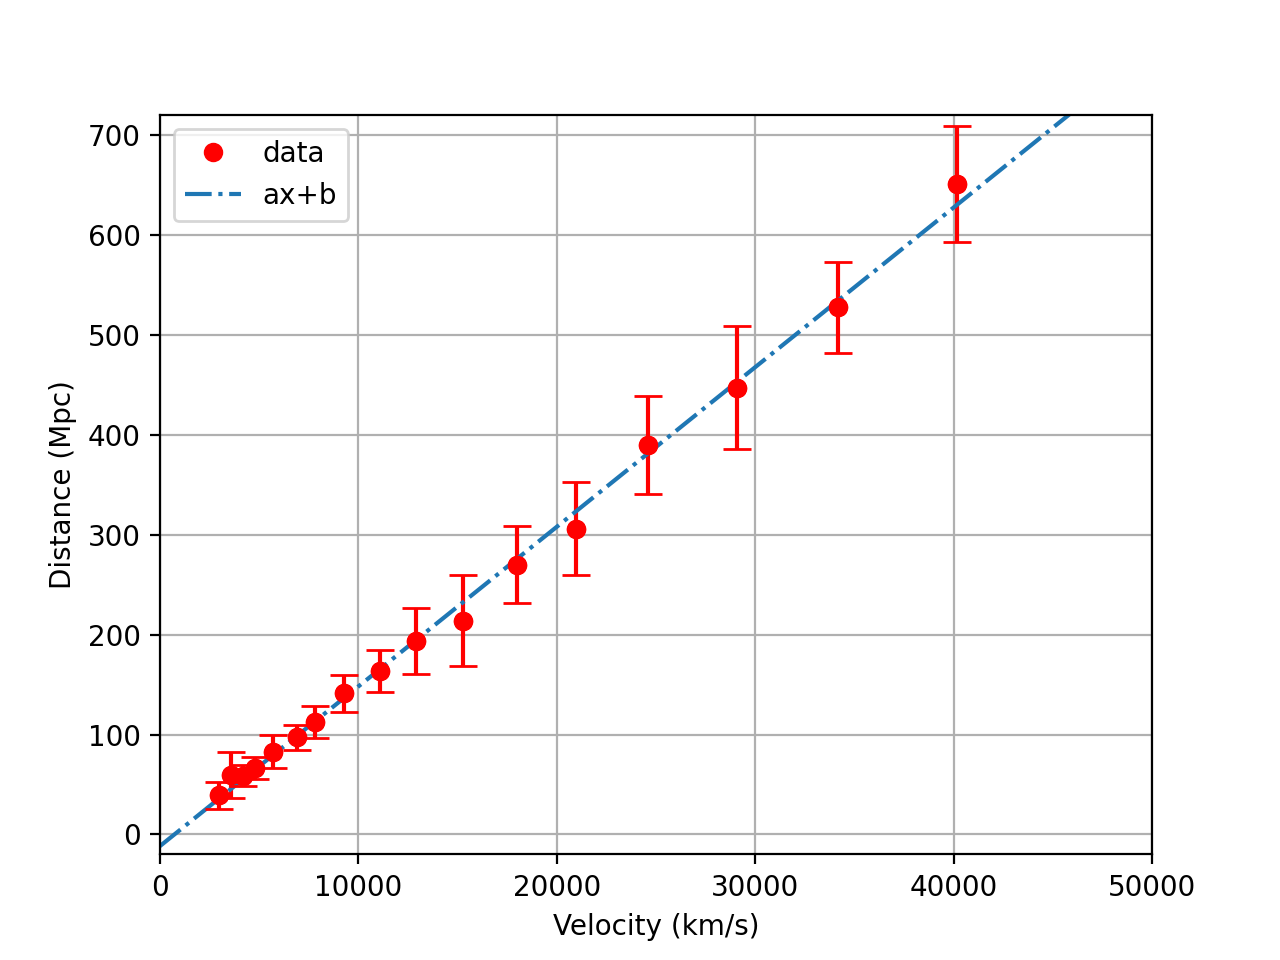

In [1]:
%matplotlib notebook  
from numpy import sqrt 
import numpy as np           
import matplotlib.pyplot as plt

#improting data
x,y,yerr = np.loadtxt("hubble_data.csv", delimiter = ",", unpack=True)

print("--------------------------------------------------------------")
print("Velocity in km/s")
print(x)
print("--------------------------------------------------------------")
print("Dinstace in Mpc")
print(y)
print("--------------------------------------------------------------")
print("Error in Distance")
print(yerr)
print("--------------------------------------------------------------")

#calculaitng mean of x,y
mean_x = np.mean(x)
mean_y = np.mean(y)

#calculating gradient equation(3)
grad = np.sum((y - mean_y)*x) / np.sum((x - mean_x)*x)

#calculating intercept equation(4)
intercept = mean_y - grad*mean_x

#calculating sum of residuals equation(2)
S = np.sum((y - grad*x - intercept)**2) 

#calculating equation(5)
D = np.sum((x - mean_x)**2)

#calculating equation (6)
grad_unc = sqrt(S/((len(x)-2)*D))

#calculating equation(7)
intercept_unc = sqrt(((1/len(x)) + ((mean_x**2)/D )*(S/(len(x)-2))))

#Calculation of Hubbles contant and its uncertainty
H0 = 1/grad 
H0_unc = H0 * (grad_unc / grad )

print()
print(f"The x mean is {mean_x}")
print(f"The y mean is {mean_y}")
print(f"The difference of mean squared is {D}")
print(f"The sum of the squares is {S}")  
print(f"The uncertanty in the gradient  ± {grad_unc}") 
print(f"The uncertanty in the intercept ± {intercept_unc}")
print("--------------------------------------------------------------")
print()
print(f"The slope gradient is --> ({grad} ± {grad_unc})")   
print(f"The y intercept is --> ({intercept} ± {intercept_unc})")
print(f"The Hubbles constant is --> ({H0} ± {H0_unc})")

#Plotting graph
plt.figure()
plt.grid(True)

#setting limits to the x and y axis 
plt.xlim(0,50000) 
plt.ylim(-20,720)

#plotting x and y values
plt.plot(x, y, 'ro', label="data")

#plotting lines
xline = np.linspace(-15,50000,2)
yline = (grad * xline) + intercept
plt.plot(xline, yline, '-.', label="ax+b")

#plotting errorbars 
plt.errorbar(x, y, yerr=yerr, capsize=5, fmt='ro')

#ploting labels to the graph
plt.ylabel('Distance (Mpc)')
plt.xlabel('Velocity (km/s)')
plt.legend(loc="best")


## Part 1) b) - First Principle : Weighted 
Implementing the equations 2-8 given below for the weighted least squares fit 


Equation (1):
$$ v = H_0 d $$ 

Equation (2): 
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

Equations (3,4): 
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
Equation (5):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

Equation (6):
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

Equation (7): 
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

Equation (8):
$$ \Delta c = \sqrt{ \frac{\sum_i w_i x_i^2}{\delta}} $$

In [2]:

w = 1/((yerr)**2)

print(w)

#calculating equation(6)
delta = ( np.sum(w)* np.sum(w * (x**2)) ) - ( (np.sum(w * x))**2 )

#calculating equation(3,4)
grad_p1b = ((np.sum(w) * np.sum(w * x * y)) - (np.sum(w * x) * np.sum(w * y)))/delta

#calculating equation(7)
grad_p1b_unc = sqrt(np.sum(w) / delta)

#calculating equation(5)
intercept_p1b = ((np.sum(w * (x**2)) * np.sum(w * y)) - (np.sum(w * x) * np.sum(w * x * y))) / delta

#calculating equation(8)
intercept_p1b_unc = sqrt(np.sum(w * (x**2)) / delta)

#calculating Hubbles constant with its uncertainty
H0_p1b = 1/grad_p1b
H0_p1b_unc = H0_p1b * (grad_p1b_unc / grad_p1b )

print("--------------------------------------------------------------")
print(f"The delta is --> {delta}")
print("--------------------------------------------------------------")
print(f"The gradient is --> ({grad_p1b} ± {grad_p1b_unc})")
print(f"The y-intercept is --> ({intercept_p1b} ± {intercept_p1b_unc})")
print(f"The Hubbles constant is --> ({H0_p1b} ± {H0_p1b_unc})")


[0.0058343  0.00188106 0.0088917  0.00811368 0.00375541 0.0063335
 0.00400958 0.0029378  0.00218285 0.00089117 0.00047762 0.0006704
 0.00046345 0.0004147  0.00026238 0.00048293 0.00029849]
--------------------------------------------------------------
The delta is --> 70033.6594908828
--------------------------------------------------------------
The gradient is --> (0.01574034318901382 ± 0.0008270257579101854)
The y-intercept is --> (-8.325855378742073 ± 7.37387236367192)
The Hubbles constant is --> (63.53101631849827 ± 3.3380331223198882)


## Part 2) a) - Polyfit function : Unweighted 


In [3]:
x,y,yerr = np.loadtxt("hubble_data.csv", delimiter = ",", unpack=True)

degree = 1 

#using covarince matrix to calculate gradient and intercept
fit1, cvm = np.polyfit(x, y, degree, cov=True) 
dfit1 = [np.sqrt(cvm[i,i]) for i in range(2)] 

#calculating Hubbles constant with its uncertainty
H0_p2a = 1/fit1[0]
H0_p2a_unc = H0_p2a * (dfit1[0] / fit1[0])

print(u"The Gradient --> {0} \xb1 {1}".format(fit1[0], dfit1[0]))
print(u"The y-intercept --> {0} \xb1 {1}".format(fit1[1], dfit1[1]))
print(f"The Hubbles constant --> ({H0_p2a} \xb1 {H0_p2a_unc})")

The Gradient --> 0.01597939731196561 ± 0.0002206588105827228
The y-intercept --> -11.624040905828377 ± 4.078725830535066
The Hubbles constant --> (62.58058301430338 ± 0.8641725807248799)


## Part 2) b) - Polyfit function : Weighted 

In [4]:
yErrors = 1/yerr

#using covarince matrix to calculate gradient and intercept
fit, cvm = np.polyfit(x,y,degree,w=yErrors,cov='unscaled')
dfit = [np.sqrt(cvm[i,i]) for i in range(2)]

#calculating Hubbles constant with its uncertainty
H0_p2b = 1/fit[0]
H0_p2b_unc = H0_p2b * (dfit[0] / fit[0])

print(u"The Gradient --> ({0} \xb1 {1})".format(fit[0], dfit[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format(fit[1], dfit[1]))
print(f"The Hubbles constant --> ({H0_p2b} \xb1 {H0_p2b_unc})")

The Gradient --> (0.01574034318901381 ± 0.000827025757910185)
The y-intercept --> (-8.32585537874202 ± 7.37387236367192)
The Hubbles constant --> (63.53101631849831 ± 3.3380331223198914)


## Part 3) a) - Curve_fit function : Unweighted 
Curve-Fit gives legitimacy to the functions and determines the coefficients to provide the line of best fit

CV - Covariance is calculated between two different variables. It describes how the two variables chnage together. 

$$ \sigma^{2}_x = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}{n -1} $$

$$ \sigma(x,y) = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n -1} $$

CVM - The covariance matrix is a square and symmetric matrix that describes the covariance between two or more random variables. The diagonal of the covariance matrix are the variances of each of the random variables. A covariance matrix is a generalization of the covariance of two variables and captures the way in which all variables in the dataset may change together.

-Reference(https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/)

-Reference(https://online.stat.psu.edu/stat505/book/export/html/636)

$$ C = \frac{\sum\limits_{i=1}^{n}(X_i - \bar{X})(X_i - \bar{X})^T}{n -1} $$

$$ C = \begin{pmatrix} \sigma^{2}_{xx} & \sigma_{xy} \\ \sigma_{yx} & \sigma^{2}_{yy} \end{pmatrix} $$

The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables.

POPT - optimal values for the parameters so that the sum f the squared resudials of f(xdata, *popt)- ydata is minimised.
 
PCOV - is the estimated covarince of popt. The diagonals provide teh varience of the parameters estimate

-Reference(https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [5]:
from scipy.optimize import curve_fit 

def straight_line(x,m,c):
    y = m*x + c 
    return y

#using covarince matrix to calculate gradient and intercept
poptUW,pcovUW = curve_fit(straight_line,x,y)
dpcovUW = [np.sqrt(pcovUW[i,i]) for i in range (2)]

#calculating Hubbles constant with its uncertainty
H0_p3a = 1/poptUW[0]
H0_p3a_unc = H0_p2b * (dpcovUW[0] / poptUW[0])

print(u"The Gradient --> ({0} \xb1 {1})".format(poptUW[0], dpcovUW[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format( poptUW[1], dpcovUW[1]))
print(f"The Hubbles constant --> ({H0_p3a} \xb1 {H0_p3a_unc})")


The Gradient --> (0.015979397335525364 ± 0.00022065881601972384)
The y-intercept --> (-11.624041470818238 ± 4.078725845736412)
The Hubbles constant --> (62.58058292203562 ± 0.8772970936897159)


## Part 3) b) - Curve_fit function : Weighted 

In [6]:
#using covarince matrix to calculate gradient and intercept
poptW,pcovW = curve_fit(straight_line,x,y, sigma=yerr, absolute_sigma=True)
dpcovW = [np.sqrt(pcovUW[i,i]) for i in range (2)]

#calculating Hubbles constant with its uncertainty
H0_p3b = 1/poptW[0]
H0_p3b_unc = H0_p2b * (dpcovW[0] / poptW[0])

print(u"The Gradient --> ({0} \xb1 {1})".format(poptW[0], dpcovW[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format( poptW[1], dpcovW[1]))
print(f"The Hubbles constant --> ({H0_p3b} \xb1 {H0_p3b_unc})")

The Gradient --> (0.015740343201647012 ± 0.00022065881601972384)
The y-intercept --> (-8.325855520937079 ± 4.078725845736412)
The Hubbles constant --> (63.5310162675083 ± 0.8906209135200259)


In [7]:
print("---------------------------First Principle----------------------------------")
print(f"--> UNWEIGHTED")
print(f"The Gradient is --> ({grad} ± {grad_unc})")   
print(f"The y intercept is --> ({intercept} ± {intercept_unc})")
print()
print(f"--> WEIGHTED")
print(f"The Gradient is --> ({grad_p1b} ± {grad_p1b_unc})")      
print(f"The y-intercept is --> ({intercept_p1b} ± {intercept_p1b_unc})")
print()
print("---------------------------Polyfit Function-----------------------------------")
print(f"--> UNWEIGHTED")
print(u"The Gradient --> {0} \xb1 {1}".format(fit1[0], dfit1[0]))
print(u"The y-intercept --> {0} \xb1 {1}".format(fit1[1], dfit1[1]))
print()
print(f"--> WEIGHTED")
print(u"The Gradient --> ({0} \xb1 {1})".format(fit[0], dfit[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format(fit[1], dfit[1]))
print()
print("---------------------------Curvefit Function-----------------------------------")
print(f"--> UNWEIGHTED")
print(u"The Gradient --> ({0} \xb1 {1})".format(poptUW[0], dpcovUW[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format( poptUW[1], dpcovUW[1]))
print()
print(f"--> WEIGHTED")
print(u"The Gradient --> ({0} \xb1 {1})".format(poptW[0], dpcovW[0]))
print(u"The y-intercept --> ({0} \xb1 {1})".format( poptW[1], dpcovW[1]))

---------------------------First Principle----------------------------------
--> UNWEIGHTED
The Gradient is --> (0.015979397311965605 ± 0.00022065881058272276)
The y intercept is --> (-11.624040905828451 ± 3.273784610507703)

--> WEIGHTED
The Gradient is --> (0.01574034318901382 ± 0.0008270257579101854)
The y-intercept is --> (-8.325855378742073 ± 7.37387236367192)

---------------------------Polyfit Function-----------------------------------
--> UNWEIGHTED
The Gradient --> 0.01597939731196561 ± 0.0002206588105827228
The y-intercept --> -11.624040905828377 ± 4.078725830535066

--> WEIGHTED
The Gradient --> (0.01574034318901381 ± 0.000827025757910185)
The y-intercept --> (-8.32585537874202 ± 7.37387236367192)

---------------------------Curvefit Function-----------------------------------
--> UNWEIGHTED
The Gradient --> (0.015979397335525364 ± 0.00022065881601972384)
The y-intercept --> (-11.624041470818238 ± 4.078725845736412)

--> WEIGHTED
The Gradient --> (0.015740343201647012 ± 0.0

I will choose to use CurveFit function for the following because it looks more professional as it uses covarience matrix.

<IPython.core.display.Javascript object>


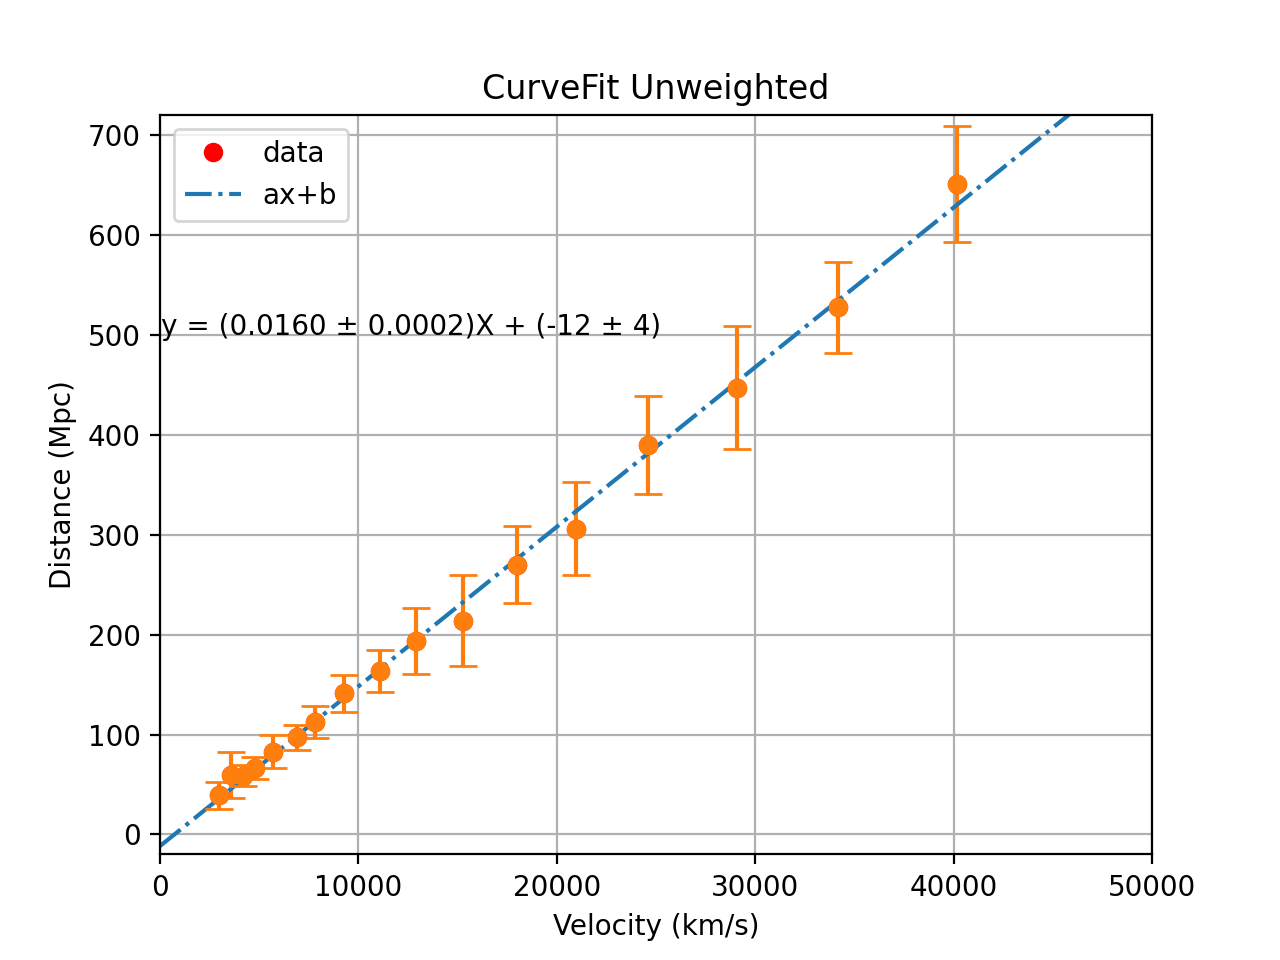

The Gradient --> (0.0160 ± 0.0002)
The y-intercept --> (-12 ± 4)
The Hubbles constant --> (62.58 ± 0.88)


In [13]:
plt.figure()
plt.grid(True)

plt.xlim(0,50000) 
plt.ylim(-20,720)

plt.plot(x, y, 'ro', label="data")

xline = np.linspace(-15,50000,2)
yline = (poptUW[0]* xline) + poptUW[1]
plt.plot(xline, yline, '-.', label="ax+b")

plt.errorbar(x, y, yerr=yerr, capsize=5, fmt='o')
plt.text(30.02, 500, u"y = ({0:0.4F} \xb1 {1:0.4f})X + ({2:0.0f} \xb1 {3:0.0f})".format(poptUW[0], dpcovUW[0], poptUW[1], dpcovUW[1]))


plt.title(f"CurveFit Unweighted")
plt.ylabel('Distance (Mpc)')
plt.xlabel('Velocity (km/s)')
plt.legend(loc="best")

print(u"The Gradient --> ({0:0.4F} \xb1 {1:0.4f}) Mps km/s".format(poptUW[0], dpcovUW[0]))
print(u"The y-intercept --> ({0:0.0f} \xb1 {1:0.0f})".format( poptUW[1], dpcovUW[1]))
print(f"The Hubbles constant --> ({H0_p3a:0.2f} \xb1 {H0_p3a_unc:0.2f})km/s Mpc")


<IPython.core.display.Javascript object>


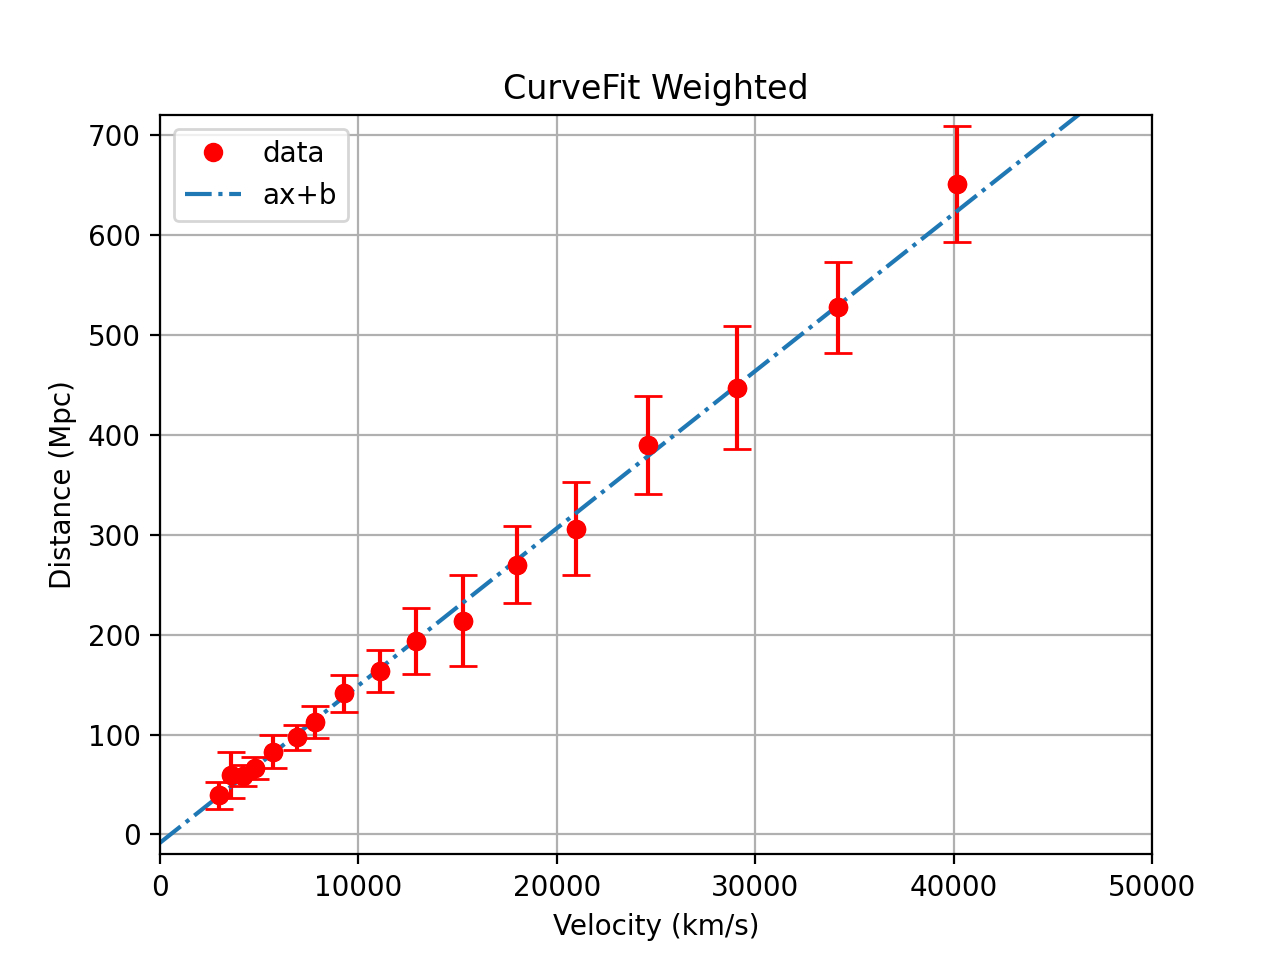

The Gradient --> (0.0157 ± 0.0002)
The y-intercept --> (-8 ± 4)
The Hubbles constant --> (63.53 ± 0.89)


In [14]:
plt.figure()
plt.grid(True)

plt.xlim(0,50000) 
plt.ylim(-20,720)

plt.plot(x, y, 'ro', label="data")

xline = np.linspace(-15,50000,2)
yline = (poptW[0]* xline) + poptW[1]
plt.plot(xline, yline, '-.', label="ax+b")

plt.errorbar(x, y, yerr=yerr, capsize=5, fmt='ro')

plt.title(f"CurveFit Weighted")
plt.ylabel('Distance (Mpc)')
plt.xlabel('Velocity (km/s)')
plt.legend(loc="best")

print(u"The Gradient --> ({0:0.4F} \xb1 {1:0.4f}) Mpc km/s".format(poptW[0], dpcovW[0]))
print(u"The y-intercept --> ({0:0.0f} \xb1 {1:0.0f} )".format( poptW[1], dpcovW[1]))
print(f"The Hubbles constant --> ({H0_p3b:0.2f} \xb1 {H0_p3b_unc:0.2f})km/s Mpc")


Gradient will be to 4dp due to the uncertainty 

The y intercept to 2 significant figure as uncertainty is to 1sf

Hubble constant to 4dp and uncertaiunty to 2dp because it is a large value thus the uncertainty needs to be more percise

Calculating the Residuals and Normalised Residuals 

Equation(1)
$$ d_i = y_i - mx_i -c $$

Equation(2)
$$ d^{nr}_i = \frac{d_i}{\Delta{y_i}}$$

<IPython.core.display.Javascript object>


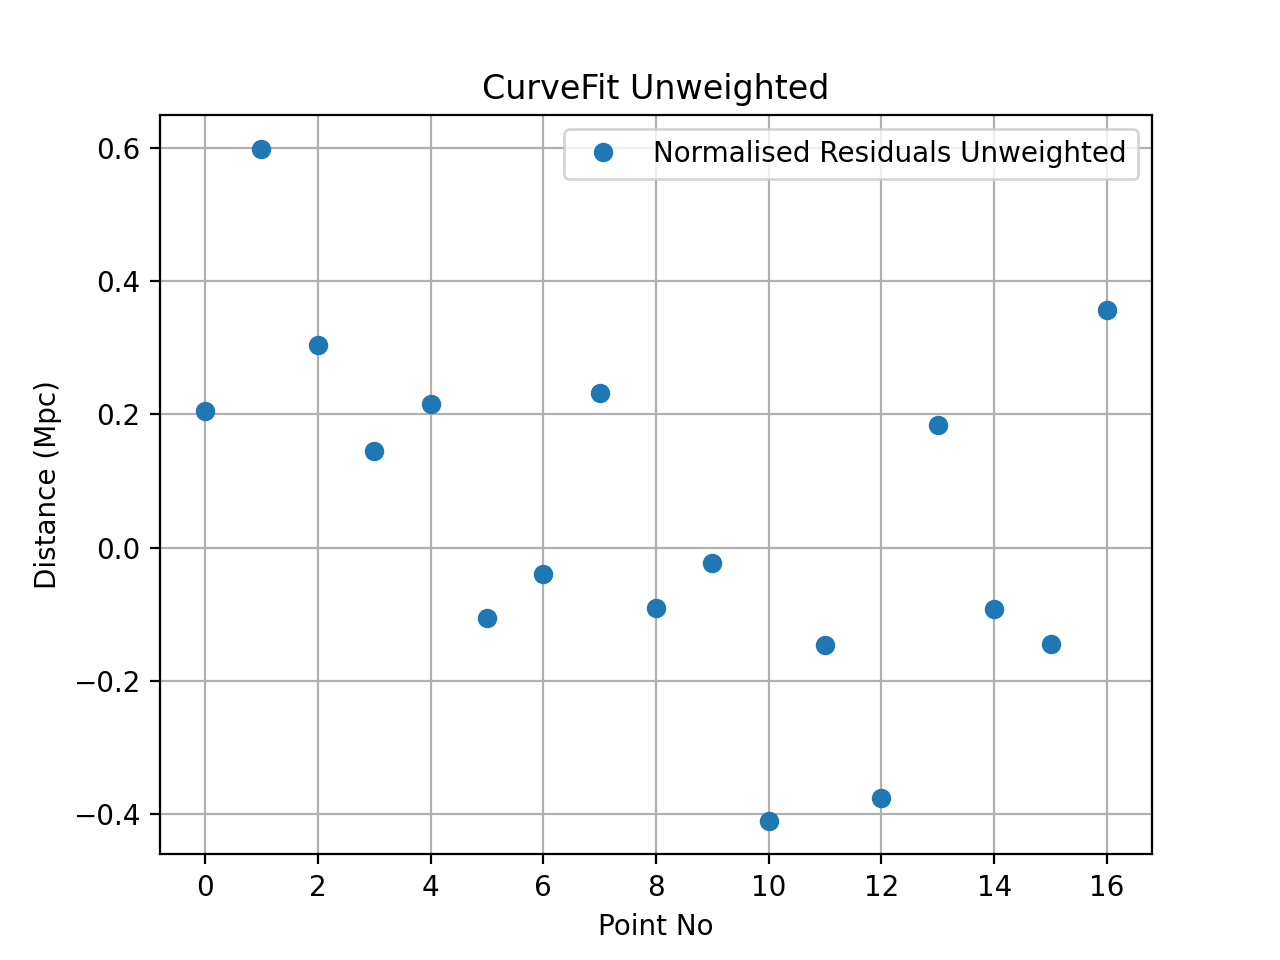

In [10]:
#calculating unweighted residuals using equation(1)
dUWi = y - poptUW[0]*x - poptUW[1]

#calculating normalised unweighted residual using equation(2)
dUWi_Norm = dUWi/yerr

plt.figure()
plt.grid(True)

#plt.plot(dUWi, 'ro', label="Residuals Unweighted")
plt.plot(dUWi_Norm,'o', label="Normalised Residuals Unweighted")

plt.title(f"CurveFit Unweighted")
plt.ylabel('Distance (Mpc)')
plt.xlabel('Point No')
plt.legend(loc="best")


Residuals are randomly distributed around zero. No trend is seen thus in not biased.It is a good fit as normalised residuals are between 1 and -1

<IPython.core.display.Javascript object>


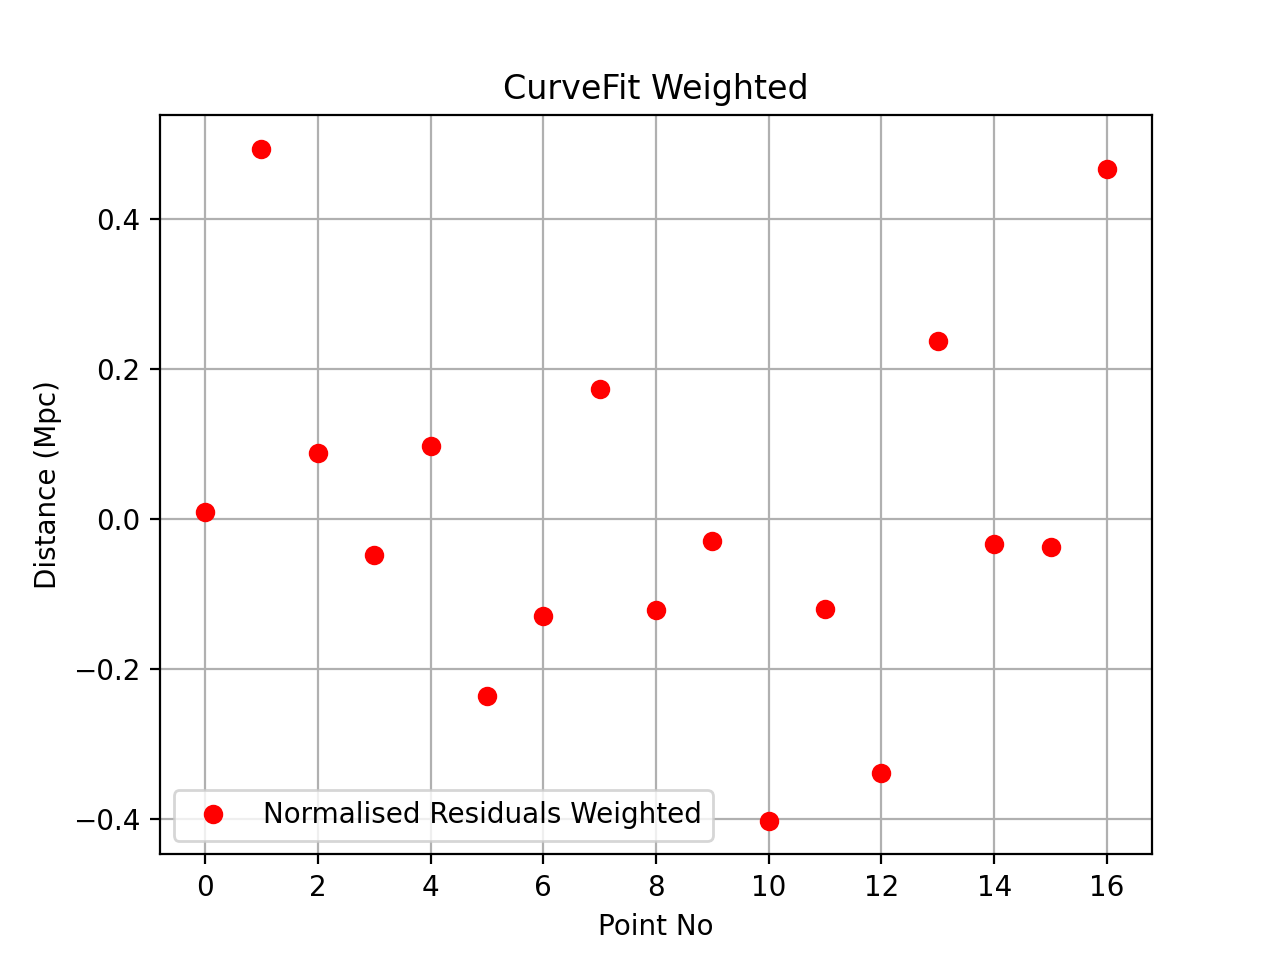

In [11]:
#calculating weighted residuals using equation(1)
dWi = y - poptW[0]*x - poptW[1]

#calculating normalised weighted residual using equation(2)
dWi_Norm = dWi/yerr


plt.figure()
plt.grid(True)

#plt.plot(dWi,'o', label="Residuals Weighted")
plt.plot(dWi_Norm,'ro', label="Normalised Residuals Weighted")

plt.title(f"CurveFit Weighted")
plt.ylabel('Distance (Mpc)')
plt.xlabel('Point No')
plt.legend(loc="best")

Residuals are randomly distributed around zero. No trend is seen thus in not biased. It is a good fit as normalised residuals are between 1 and -1

In [12]:
print("---------------------------Weighted curvefit-----------------------------------")
print(f"The Hubbles constant --> ({H0_p3b:0.1f} \xb1 {H0_p3b_unc:0.1f}) km/s Mpc")
print()
print("---------------------------Unweighted curvefit-----------------------------------")
print(f"The Hubbles constant --> ({H0_p3a:0.1f} \xb1 {H0_p3a_unc:0.1f}) km/s Mpc")

---------------------------Weighted curvefit-----------------------------------
The Hubbles constant --> (63.5 ± 0.9) km/s Mpc

---------------------------Unweighted curvefit-----------------------------------
The Hubbles constant --> (62.6 ± 0.9) km/s Mpc


$$ \large{ Weighted / Unweighted} $$

In Unweighted fit, there is an assumption that all data points had equal weighting. But different data ponts have different vertical error bars, need to give less weight (less importance) to points with large error. Thus need to perform a weighted fit. Thus weighted fit is better in order to find the Hubble constant 


Using information from the European Space Agency's Planck satellite. Making measurements of the cosmic microwave background — an echo from the Big Bang that contains data about the universe's basic parameters. Planck found the Hubble constant to be 46,200 mph per million light-years (67.4 km/s Mpc) in 2018. *reference(https://www.livescience.com/hubble-constant.html)*

Comparing to the results from European Space Agency, the result from Curvefit Weighted is very close with the deviation of (67.4 - 63.5) = 3,9 km/s Mpc which is 6% deviation